# Pricing American Options with Montecarlo #

### Part 1 - Variance Reduction Techniques ###

## Variance Reduction, Efficiency Improvement and Error Estimation##

In this lesson we most follow the Paul Glasserman’s book, "Monte Carlo Methods in Financial Engineering" (Springer, 2004). Chapter 4 ("Variance Reduction Techniques") is used for basic deﬁnitions, formulations.

### Error Estimation ###

Reducing simulation error is often at odds with convenient estimation of the simulation error itself; in order to supplement a reduced-variance estimator with a valid confidence interval, we sometimes need to sacrifice some of the potential variance reduction. 

### Efficiency Issues ###

First of all remember that the greatest gains from variance reduction techniques result from exploiting specific features of a problem rather than from generic applications of generic methods. This means that in general not only some techniques can work better than others but that the same technique applied in different conditions (e.g. different values of the simulation parameters) can sometimes produce different results.

Suppose we want to estimate a generic derivative price $\alpha$. 

\begin{equation}
\hat \alpha_n = \frac{1}{n} \sum\limits_{i=1}^n f(x_i)
\label{eqn:mc_estimator}
\end{equation}

Equation $\eqref{eqn:mc_estimator}$ provides the estimator of $\alpha$ based on $n$ Monte Carlo replications. The standar deviation of the estimate is given by

\begin{equation}
s_f = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^n \left( 
f(x_i) - \hat \alpha_n
\right)^2}
\end{equation}

The standard error of the estimator is $s_f/\sqrt{n}$. This implies that decreasing the standard deviation by a factor of 10 while leaving everything else unchanged is equivalent to increasing the number of simulations by a factor of 100 in terms of error reduction.

Suppose now that we have at our disposal two unbiased Monte Carlo estimators $\hat\alpha^1$ and $\hat\alpha^2$. Since both are unbiased, we have 

$$E[\hat\alpha^1] = E[\hat\alpha^2] = \alpha$$ 

Let's assume that the standard deviations are $\sigma_1$ and $\sigma_2$  respectively but with $\sigma_1 < \sigma_2$. From the previous observation, given a number $n$ of replications, $\hat\alpha^1$ will present a lower error than $\hat\alpha^2$. However this analysis oversimplifies the comparison because it does not take into account eventual differences in the computational time required by the estimators. Smaller variance is not a sufficient ground for preferring one estimator over the other if its calculation is more time-consuming. A more exhaustive procedure is required to compare estimators with different computational requirements as well as different variances.

Suppose that $\tau_i, i=1,2$ is the time required to generate one replication of $\hat\alpha^1$ and $\hat\alpha^2$ respectively. With a given time budget $\tau$ the number of replications of $\hat\alpha^i$ is $t/\tau_i$. The two estimators with computing time $t$ are:

$$\frac{\tau_1}{t} \sum\limits_{i=1}^{t/\tau_1} \hat\alpha_i^1
\quad\quad \textrm{and} \quad\quad
\frac{\tau_2}{t} \sum\limits_{i=1}^{t/\tau_2} \hat\alpha_i^2
$$

and for large enough $t$ they are normally distributed with mean $\alpha$ and standard deviations

$$
\sigma_1 \sqrt{\frac{\tau_1}{t}}
\quad\quad \textrm{and} \quad\quad
\sigma_2 \sqrt{\frac{\tau_2}{t}}
$$

Boyle et al. (1997) provided the condition that should be satisfied in order to prefer the first estimator over the second:

$$
\sigma_1^2 \tau_1 < \sigma_2^2 \tau_2
$$

The inverse of the product of variance times the time necessary to perform a single run is indicated in the literature with the name of *efficiency* (Hammersley and Handscomb, 1964). Using efficiency as a basis for comparing different estimators, we can conclude that the low variance estimator is preferable to the other only if the ratio of variances is smaller than the ratio between the times of single replication.


## Antithetic Variates ##

### Description ###

The method of antithetic variates is one of the simplest and widely used techniques 
in financial pricing problems. It attempts to reduce the estimator variance by 
introducing negative dependence between pairs of replications.

The core observation is that if a random variable $U$ is uniformly distributed over 
$[0, 1]$ then $1-U$ is too. Thus if we generate paths using as inputs 
$U_1, \dots, U_n$ it is possible 
to generate additional paths using $1- U_1, \dots, 1-U_n$ without changing the law of the simulated 
process. The combinations of variables $(U_i, 1-U_i)$ constitute antithetic pairs 
in the 
sense that generally a large value of one is followed by a small 
value of the other.

These observations extend to other distributions through the inverse transform 
method. Specifically, in a simulation of stochastic processes based 
on independent standard normal random variables, antithetic pairs may be 
constructed by pairing a sequence $Z_1, \dots, Z_n$ of i.i.d. $N(0,1$ variables 
with the sequence $-Z_1, \dots, -Z_n$ 
of i.i.d.$N(0,1$ variables. If the $Z_is$ are used to simulate the increments of a 
Brownian path the $-Z_is$ simulate the increments of the reflection of the path 
about the origin.

To analyze the variance reduction produced by the method imagine we have 
to estimate an expectation $E[Y]$ and that using antithetic sampling we produce 
a series of pairs of observations $(Y_1, \tilde{Y}_1), \dots,  (Y_n, \tilde{Y}_n)$. 
The procedure presents the 
following characteristics:

- the pairs $(Y_1, \tilde{Y}_1), \dots,  (Y_n, \tilde{Y}_n)$ are i.i.d.;
- For each $i$, $Y_i$ and $\tilde{Y}_i$ have the same distribution, though 
they are not independent.

The antithetic variates estimator is defined as

$$
\hat{Y}_{AV} = \frac{1}{2n} \Bigl( \sum\limits_{i=1}^n Y_i +
\sum\limits_{i=1}^n \tilde{Y}_i \Bigr) =
\frac{1}{n} \sum\limits_{i=1}^n \Bigl( \frac{Y_i+\tilde{Y}_i}{2} \Bigl)
$$

The central limit theorem implies that

$$
\frac{\hat{Y}_{AV} - E[Y]}{\sigma_{AV}/\sqrt{n}} \Rightarrow N(0,1)
$$

with

$$
\sigma_{AV}^2 = \textit{var} \Bigl[\frac{Y_i + \tilde{Y}_i}{2}\Bigr]
$$

As for the case of the Monte Carlo estimator the limit distribution 
continues 
to hold if we replace the population standard deviation  $\sigma_{AV}$
with the sample 
standard deviation of the $n$ values. This justify the construction of 
a $1-\delta$ confidence interval of the form

$$
\hat{Y}_{AV} \pm z_{\delta/2} \frac{s_{AV}}{\sqrt{n}}
$$

Before comparing the antithetic variates estimator with the Monte Carlo 
one we make the assumption that the computational time required to simulate
 a pair $(Y_i, \tilde{Y}_i)$ is approximately twice the effort 
 required to simulate a 
 single observation $Y_i$. Following this assumption it is reasonable to 
 compare the variance of $\hat{Y}_{AV}$ with the variance of a 
 Monte Carlo estimator 
 based on $2n$ independent replications. In particular antithetic variates 
 reduce variance if:

$$
\textit{var}[\hat{Y}_{AV}] < \textit{var} \Bigl[ 
\frac{1}{2n} \sum\limits_{i=1}^{2n} Y_i 
\Bigr]
$$

or

$$
\textit{var}[Y_i + \tilde{Y}_i] < 2 \textit{var}[Y_i] \quad \Rightarrow \quad
2 \textit{var}[Y_i] + 2 \textit{cov}[Y_i, \tilde{Y}_i]< 2 \textit{var}[Y_i] \quad \Rightarrow \quad 
\textit{cov}[Y_i, \tilde{Y}_i] < 0
$$

The condition requires that the negative dependence of the input random 
variables produces negative covariance between the estimates of two 
paired replications. A sufficient condition ensuring this is monotonicity 
of the mapping function from inputs to outputs defined in the algorithm.
 Therefore if $Y=f(Z_1, \dots, Z_n)$ for some increasing function $f$
 then $\tilde{Y}=f(-Z_1, \dots, -Z_n)$ is a decreasing function 
 of $(Z_1, \dots, Z_n)$. In this case we have
 
 $$
 E[f(Z_i)f(-Z_i)] \le E[f(Z_i)]E[f(-Z_i)] \Rightarrow
 \textit{cov}[Y_i, \tilde{Y}_i] = E[f(Z_i)f(-Z_i)] - 
 E[f(Z_i)]E[f(-Z_i)] \le 0
 $$
 
 This argument can be adapted to show that the method of antithetic 
 variates increases efficiency in pricing options that depend monotonically on inputs (e.g. European, American or Asian options). Note that **in the case of non-monotome payoffs, the method of antithetical variables does not necessarily provide better performance than the standard Monte Carlo, indeed in some conditions the results can be significantly worse**.



In [2]:
%matplotlib inline

import math
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt

from gdl_finance.analytic    import BlackScholes

In [65]:
# np.random.seed(1234)
#
# Model Parameters -----------------------------------------------------------------
#
S0     =  70.0   # initial stock level
K      = 100.0   # strike price
T      =   1.0   # time-to-maturity
r      =   0.05  # short rate
delta  =   0.0   # dividend yield
sigma  =   0.20  # volatility
payout =   -1     # 1 stay for call and -1 stay for put
#
# Simulation Parameters -------------------------------------------------------------
#
b = 10000      # number of paths
M = 10         # number of points for each path
dt = float(T) /float( M)
df = math.exp(-r * T)

In [66]:
option_price = BlackScholes(payout, S0, K, r, delta, sigma, T)
#
# Random numbers generations. We use the function 'randn' which returns 
# a sample (or samples) from the "standard normal" distribution.
# If positive, int_like or int-convertible arguments are provided,
# 'randn' generates an array of shape (d0, d1, ..., dn), filled
# with random floats sampled from a univariate "normal" (Gaussian)
# distribution of mean 0 and variance 1
#
z1  = np.random.randn(M, b) 
#
# Stock Price Paths. The function 'cumsum' returns the cumulative sum 
# of the elements along a given axis, in this case we want to sum along
# the time axis (axis=0)
#
S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
    + sigma * math.sqrt(dt) * z1, axis=0))
S1 = np.insert(S1, 0, S0, axis=0)

In [67]:
z2  = np.random.randn(M, int(b/2))  
#
S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
       + sigma * math.sqrt(dt) * z2, axis=0))
S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
       + sigma * math.sqrt(dt) * (-z2), axis=0))
S21 = np.insert(S21, 0, S0, axis=0)
S22 = np.insert(S22, 0, S0, axis=0)

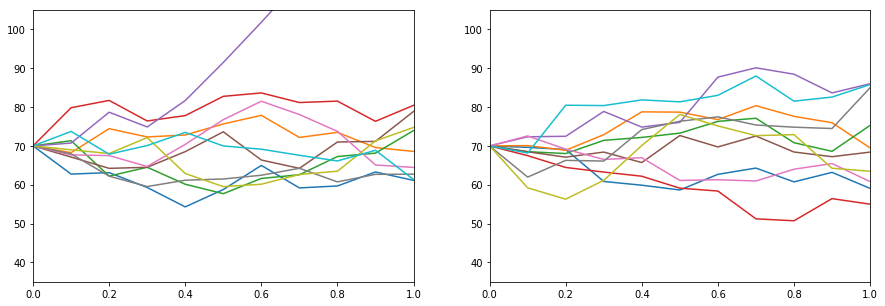

In [68]:
t = np.linspace(0, T, M+1)

# plotting the first n paths

paths_1 = S1[:,0:10]
fig = plt.figure(figsize=(15,5))
axis = fig.add_subplot(121, autoscale_on=False, xlim=(0,T), ylim=(.5 * S0,1.5*S0))
plt.plot(t, paths_1)

S2 = np.append(S21, S22, axis=1)

paths_1 = S2[:,0:10]
axis = fig.add_subplot(122, autoscale_on=False, xlim=(0,T), ylim=(.5 * S0,1.5*S0))
plt.plot(t, paths_1)

plt.show()

In [69]:
option_price_est_1 = np.maximum(payout*(S1[-1] - K), 0)
std_dev_1          = np.std(option_price_est_1)
option_price_est_1 = np.average(option_price_est_1)  * df
    
option_price_est_21 = np.maximum(payout*(S21[-1] - K), 0) 
option_price_est_22 = np.maximum(payout*(S22[-1] - K), 0) 

option_price_est_2 = 0.5 * (option_price_est_21 + option_price_est_22)
std_dev_2          = np.std(option_price_est_2)
option_price_est_2 = np.average(option_price_est_2) * df

In [70]:
print('BS price             = ' + str("%.3f" % option_price))
print('Antithetic MC        = ' + str("%.3f" % option_price_est_2) + ' +/- ' + str("%.3f" % (1.96 * std_dev_2/math.sqrt(b))))
print('Simple     MC        = ' + str("%.3f" % option_price_est_1) + ' +/- ' + str("%.3f" % (1.96 * std_dev_1/math.sqrt(b))))

BS price             = 25.564
Antithetic MC        = 25.579 +/- 0.021
Simple     MC        = 25.705 +/- 0.267


## Analysis of Variance Reduction ##

### Whit respect to K and $\sigma$ ###

In [45]:
from pandas import DataFrame

Strikes = [70, 80, 90, 100, 110, 120]
Sigmas  = [0.01, 0.05, 0.1, 0.2, 0.25, 0.30]

col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
for K in Strikes:
    for sigma in Sigmas:
        option_price = BlackScholes('C', S0, K, r, delta, sigma, T)
        #
        z1  = np.random.randn(M, b) 
        #
        S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
            + sigma * math.sqrt(dt) * z1, axis=0))
        S1 = np.insert(S1, 0, S0, axis=0) 
        #
        z2  = np.random.randn(M, int(b/2))  
        #
        S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
               + sigma * math.sqrt(dt) * z2, axis=0))
        S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
               + sigma * math.sqrt(dt) * (-z2), axis=0))
        S21 = np.insert(S21, 0, S0, axis=0)
        S22 = np.insert(S22, 0, S0, axis=0)
        #
        option_price_est_1 = np.maximum(S1[-1] - K, 0) * df
        std_dev_1          = np.std(option_price_est_1)
        option_price_est_1 = np.average(option_price_est_1)
    
        option_price_est_21 = np.maximum(S21[-1] - K, 0) * df
        option_price_est_22 = np.maximum(S22[-1] - K, 0) * df

        option_price_est_2 = 0.5 * (option_price_est_21 + option_price_est_22)
        std_dev_2          = np.std(option_price_est_2)
        option_price_est_2 = np.average(option_price_est_2)
         
        col1.append(K)
        col2.append(sigma)
        col3.append('{:10.6f}'.format(option_price))
        col4.append('{:10.6f}'.format(option_price_est_1))
        col5.append('{:10.6f}'.format(option_price_est_2))
        col6.append(1.96 * std_dev_1/math.sqrt(b))
        col7.append(1.96 * std_dev_2/math.sqrt(b))
        
data = {'strike'    : col1, 
        'sigma'     : col2, 
        'BS price'  : col3,
        'MC simple' : col4,
        'SE simple' : col6, 
        'MC AV'     : col5,
        'SE AV'     : col7}

frame = DataFrame(data, columns=['strike','sigma','BS price','MC simple','SE simple','MC AV','SE AV'])
frame.head()

,strike,sigma,BS price,MC simple,SE simple,MC AV,SE AV
0,70,0.01,0.000000,3.416074,0.004347,3.413911,0.000031
1,70,0.05,0.284348,3.698088,0.019015,3.698246,0.004295
2,70,0.10,1.349530,4.730967,0.033422,4.757864,0.012954
3,70,0.20,3.901468,7.281845,0.063733,7.320079,0.031937
4,70,0.25,5.221259,8.742159,0.080591,8.645102,0.042417


### With Respect to the Number of Simulations ###

In [18]:
import sys

def antithetic_simulation(pars, start, finish, print_output=True):
    #
    # Simulation Parameters -------------------------------------------------------------
    #
    S0     = pars['S0']
    K      = pars['K']
    r      = pars['r']
    delta  = pars['delta']
    sigma  = pars['sigma']
    T      = pars['T']
    payout = pars['payout']
    M      = 3      # number of points for each path
    dt     = float(T) /float( M)
    df     = math.exp(-r * T)
    #
    # -----------------------------------------------------------------------------------
    #
    x   = []
    y1  = []
    y2  = []
    for b in range(start, finish, 2):
        option_price = BlackScholes(payout, S0, K, r, delta, sigma, T)
        #
        # Random numbers generations. We use the function 'randn' which returns 
        # a sample (or samples) from the "standard normal" distribution.
        # If positive, int_like or int-convertible arguments are provided,
        # 'randn' generates an array of shape (d0, d1, ..., dn), filled
        # with random floats sampled from a univariate "normal" (Gaussian)
        # distribution of mean 0 and variance 1
        #
        z1  = np.random.randn(M, b) 
        #
        # Stock Price Paths. The function 'cumsum' returns the cumulative sum 
        # of the elements along a given axis, in this case we want to sum along
        # the time axis (axis=0)
        #
        S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
            + sigma * math.sqrt(dt) * z1, axis=0))
        S1 = np.insert(S1, 0, S0, axis=0)
        
        option_price_est_1 = np.maximum(payout*(S1[-1] - K), 0) * df
        std_dev_1          = np.std(option_price_est_1)
        option_price_est_1 = np.average(option_price_est_1)
        #
        #--------------------------------------------------------------------------------
        #
        z2  = np.random.randn(M, int(b/2))  
        #
        S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
               + sigma * math.sqrt(dt) * z2, axis=0))
        S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
               + sigma * math.sqrt(dt) * (-z2), axis=0))
        S21 = np.insert(S21, 0, S0, axis=0)
        S22 = np.insert(S22, 0, S0, axis=0)
        
        option_price_est_21 = np.maximum(payout*(S21[-1] - K), 0) * df
        option_price_est_22 = np.maximum(payout*(S22[-1] - K), 0) * df
    
        option_price_est_2 = 0.5 * (option_price_est_21 + option_price_est_22)
        std_dev_2          = np.std(option_price_est_2)
        option_price_est_2 = np.average(option_price_est_2)
        #
        #--------------------------------------------------------------------------------
        #
        x.append(b)
        y1.append(option_price_est_1)
        y2.append(option_price_est_2)
            
        sys.stdout.write("\r" + 'Simulation number    = ' + str(b))
        sys.stdout.flush()
    
    return x, y1, y2, option_price    

In [19]:
#
# Model Parameters -----------------------------------------------------------------
#
param = {'S0':70.0,     # initial stock level
         'K':100.0,     # strike price
         'T':1.0,       # time-to-maturity
         'r':0.05,      # short rate
         'delta':0.0,   # dividend yield
         'sigma':0.10,  # volatility
         'payout':-1,   # 1 stay for call and -1 stay for put
}

x, y1, y2, bs_price = antithetic_simulation(param,100,10002)
print('\nDone!')

Simulation number    = 10000
Done!


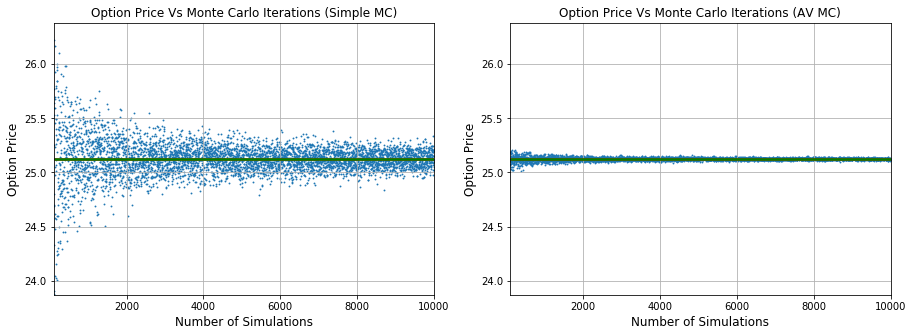

In [20]:
if len(x) > 1:
    
    y_inf = 0.95
    y_sup = 2.0 - y_inf
    
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    plt.xlim((min(x), max(x)))
    plt.ylim((y_inf * bs_price, y_sup * bs_price))
    plt.title('Option Price Vs Monte Carlo Iterations (Simple MC)', fontsize=12)
    plt.xlabel('Number of Simulations',                             fontsize=12)
    plt.ylabel('Option Price',                                      fontsize=12)
    plt.grid(True)
    plt.savefig('var_red_antithetic_1_simple.png')
    plt.scatter(x,y1,marker='.',s=3)
    plt.hlines(np.average(y1), min(x), max(x), colors='red',        linewidth=2.5)
    plt.hlines(bs_price,   min(x), max(x), colors='green',      linewidth=2.5)
    
    plt.subplot(122)
    plt.xlim((min(x), max(x)))
    plt.ylim((y_inf * bs_price, y_sup * bs_price))
    plt.title('Option Price Vs Monte Carlo Iterations (AV MC)',     fontsize=12)
    plt.xlabel('Number of Simulations',                             fontsize=12)
    plt.ylabel('Option Price',                                      fontsize=12)
    plt.grid(True)
    plt.savefig('var_red_antithetic_1_anti.png')
    plt.scatter(x,y2,marker='.',s=3)
    plt.hlines(np.average(y2), min(x), max(x), colors='red',        linewidth=2.5)
    plt.hlines(bs_price,   min(x), max(x), colors='green',     linewidth=2.5)

    plt.show()

## Control Variate ##


The method of control variate is among the most widely applicable, easiest to use and effective of the variance reduction techniques. It generally exploits information about the errors in estimates of known quantities to reduce the error in an estimate of an unknown quantity.

Suppose again we want to estimate the derivative price $\alpha$. The Monte Carlo estimator from $n$ independent and identically distributed replications $\alpha_1, \dots, \alpha_n$ is $\hat\alpha = 
(\alpha_1 + \dots + \alpha_n)/n$.

Imagine now, that for each replication it is possible to calculate another 
output $X_i$ along with $\alpha_i$. The pairs $(X_i, \alpha_i), i=1,\dots,n$ 
are i.i.d.  and suppose that the expectation $E[X]$ is known. Thus for any fixed $b$ 
it is possible to calculate

$$
\alpha_i(b) = \alpha_i - b \left( X_i - E[X] \right) 
$$

for each replication $i$. The control variate Monte Carlo estimator would then be

$$
\hat\alpha(b) = \hat\alpha -b \left( \hat{X} - E[X] \right) =
\frac{1}{n} \sum\limits_{i=1}^n \bigl( \alpha_i - b \left(X_i - E[X] \right) \bigr)
$$

and the observed error $\hat{X} - E[X]$ is used to control the estimate 
$E[\alpha]$. We can demonstrate that the control variate estimator is unbiased and consistent.

The variance of each replication $\alpha_i(b)$ is

\begin{equation}
\textit{var} [\alpha_i(b)] = \textit{var} [\alpha_i - b (X_i - E[X]) ] =
\sigma_{\alpha}^2 - 2b \sigma_{\alpha} \sigma_X \rho + b^2 \sigma_X^2 =
\sigma^2(b)
\label{eqn:variance_control_estimate_1}
\end{equation}

where $\sigma_X^2 = \textit{var}[X], \sigma_\alpha^2 = \textit{var}[\alpha_i]$ and 
$\rho$ is the correlation between $X$ and $\alpha$. Comparing the control variate 
estimator variance $\sigma^2(b)/n$ and the ordinary Monte Carlo estimator variance 
$\sigma^2/n$ it is possible to infer that the control variate estimator 
$\hat\alpha(b)$ has smaller variance than the standard estimator $\hat\alpha$ 
if $b^2 \sigma_X < 2 b \sigma_\alpha \rho$.

The optimal coefficient that minimizes the variance in $\eqref{eqn:variance_control_estimate_1}$ is

\begin{equation}
b^\star =\frac{\sigma_\alpha}{\sigma_X} \rho = \frac{\textit{cov}[X, \alpha]}{\textit{var}[X]}
\label{eqn:variance_control_estimate_3}
\end{equation}

Plugging this value into $\eqref{eqn:variance_control_estimate_1}$ and arranging it is possible to find the ratio 
of the variance of the optimally controlled estimator to the one of the 
uncontrolled estimator

\begin{equation}
\frac{\textit{var}[\hat\alpha - b^\star (\hat{X} -E[X])]}{\textit{var}[\hat\alpha]}
= 1-\rho^2
\label{eqn:variance_control_estimate_2}
\end{equation}


From equation $\eqref{eqn:variance_control_estimate_2}$ it is possible to observe some important features of the method:

- With the optimal coefficient $b^\star$, the effectiveness of a control variate 
is determined by the size of the correlation between $\alpha$ and $X$. Moreover 
the sign of the correlation is irrelevant.

- If the computational effort required per replication is roughly the same 
with and without the control variate then equation (2.6) measures the computational 
improvement from the use of a control variate. Specifically $n/(1-\rho^2)$
 replications of $\alpha_i$ are necessary to achieve the same variance as 
 $n$ replications of the control variate estimator.

- The variance reduction factor $1/(1-\rho^2)$ increases very sharply as 
$\vert \rho \vert$ approaches $1$ and it drops off quickly as 
$\vert \rho \vert$ decreases away from $1$.


In practice since $E[\alpha]$ is unknown it is likely that also $\sigma_\alpha$
and $\rho$ are unknown thus creating a problem in the calculation of the 
optimal coefficient $b^\star$. However it is still possible to get the most 
of the benefit of a control variate by using an estimate of $b^\star$. 
Replacing the population parameters in $\eqref{eqn:variance_control_estimate_3}$ with their sample counterparts 
yields the estimate

\begin{equation}
\hat{b}_n = \frac{\sum\limits_{i=1}^n (X_i - \hat{X})(\alpha_i - \hat\alpha)}
                 {\sum\limits_{i=1}^n (X_i - \hat{X})^2} 
\label{eqn:variance_control_estimate_4}
\end{equation}

The expression in $\eqref{eqn:variance_control_estimate_4}$ is the slope of the least-squares regression line 
through the points $(X_i, \alpha_i), i=1,\dots,n$ which can be calculated easily.

### A practical Example: MC Pricing of an Asian Option ###

Asian options are options in which the underlying variable is the average price over a
period of time. Because of this fact, Asian options have a lower volatility and hence
rendering them cheaper relative to their European counterparts. They are commonly traded on currencies and commodity products which have
low trading volumes. They were originally used in 1987 when Banker's Trust Tokyo
office used them for pricing average options on crude oil contracts; and hence the
name "Asian" option.

There are numerous permutations of Asian option; the most basic are listed below:

- Fixed strike (also known as an average rate) Asian call payout

$$C(T)={\text{max}}\left(A(0,T)-K,0\right)$$

where $A$ denotes the average price for the period $[0, T]$, and $K$ is the strike price. The equivalent put option is given by

$$P(T)={\text{max}}\left(K-A(0,T),0\right)$$

- The floating strike (or floating rate) Asian call option has the payout

$$C(T)={\text{max}}\left(S(T)-kA(0,T),0\right)$$

where $S(T)$ is the price at maturity and $k$ is a weighting, usually 1 so often omitted from descriptions. The equivalent put option payoff is given by

$$P(T)={\text{max}}\left(kA(0,T)-S(T),0\right)$$

The Average $A$ may be obtained in many ways. Conventionally, this means an arithmetic average. In the continuous case, this is obtained by

$$A(0,T)={\frac  {1}{T}}\int _{{0}}^{{T}}S(t)dt$$

For the case of discrete monitoring (with monitoring at the times $0=t_{0},t_{1},t_{2},\dots ,t_{n}=T$ and $t_{i}=i\cdot {\frac {T}{n}}$

we have the average given by

$$A(0,T)={\frac {1}{n}}\sum _{i=1}^{n}S(t_{i})$$

There also exist Asian options with geometric average; in the continuous case, this is given by

$$A(0,T)=\exp \left({\frac  {1}{T}}\int _{{0}}^{{T}}\ln(S(t))dt\right)$$

It's remarkable that it's possible to find a closed-form solution for the geometric Asian option; when used in conjunction with control variates in Monte Carlo simulations, the formula is useful for deriving fair values for the arithmetic Asian option. For the call we have

$$C_{G}=S_{0}e^{(b-r)T}\Phi (d_{1})-Ke^{-rT}\Phi (d_{2})$$

and for the put

$$P_{G}=Ke^{-rT}\Phi (-d_{2})-S_{0}e^{(b-r)T}\Phi (-d_{1})$$

where

$$b={1 \over {2}}\left(r-{1 \over {2}}\sigma _{G}^{2}\right),\;\sigma _{G}={\sigma  \over {\sqrt {3}}}$$
$$d_{1}={\log {S_{0} \over {K}}+\left(b+{1 \over {2}}\sigma _{G}^{2}\right)T \over {\sigma _{G}{\sqrt {T}}}},\;d_{2}=d_{1}-\sigma _{G}{\sqrt {T}}$$



In [119]:
from ipywidgets import IntProgress
from IPython.display import display

In [120]:
from scipy.stats.mstats     import gmean
from gdl_finance.analytic   import AsianGeometric
#
# Model Parameters -----------------------------------------------------------------
#
S0    = 100.0   # initial stock level
K     =  70.0   # strike price
T     =   1.0   # time-to-maturity
r     =   0.01  # short rate
delta =   0.0   # dividend yield
sigma =   0.4   # volatility
navg  =   24


IntProgress(value=0, max=10002)

Simulation number    = 10000

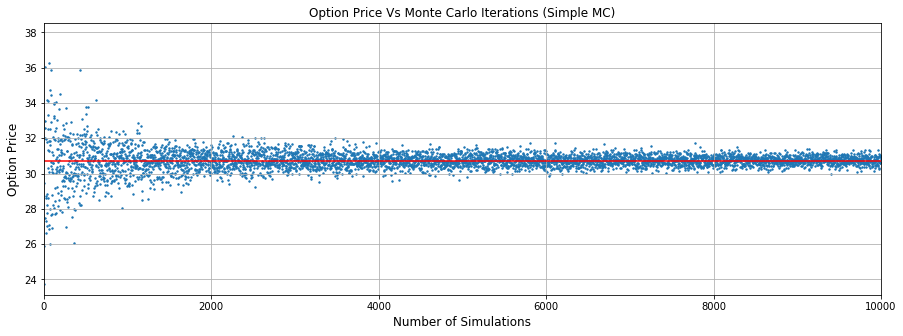

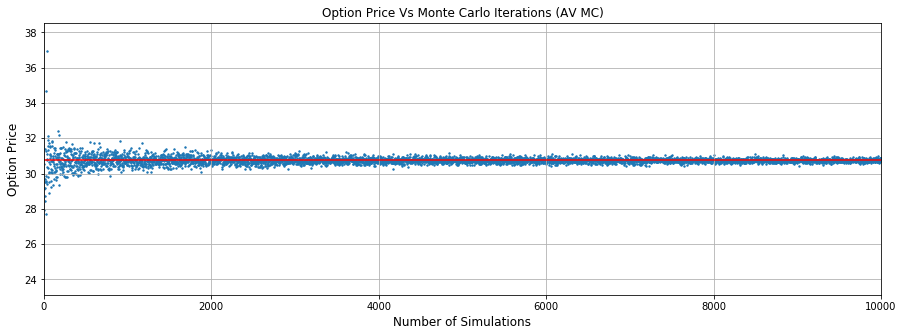

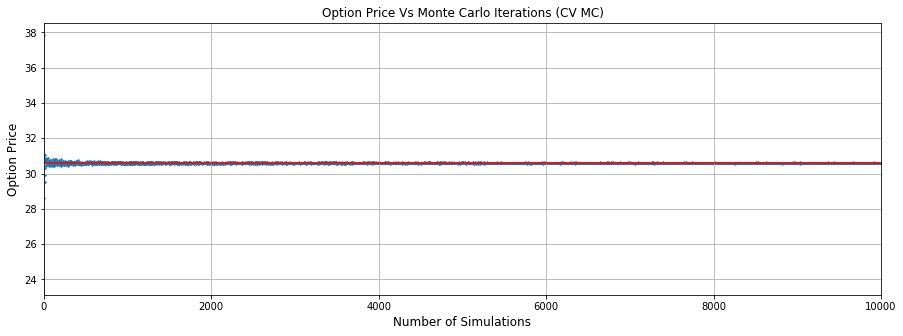

In [121]:
#
# Simulation Parameters -------------------------------------------------------------
#
b_max = 10002   # number of paths
M     = 25      # number of points for each path
dt    = float(T) /float( M)
df    = math.exp(-r * T)
#
# -----------------------------------------------------------------------------------
#
f = IntProgress(min=0, max=b_max) # instantiate the bar
display(f) # display the bar
#
x   = []
y1  = []
y2  = []
y3  = []
for b in range(2, b_max, 2):
    #
    # Random numbers generations. We use the function 'randn' which returns 
    # a sample (or samples) from the "standard normal" distribution.
    # If positive, int_like or int-convertible arguments are provided,
    # 'randn' generates an array of shape (d0, d1, ..., dn), filled
    # with random floats sampled from a univariate "normal" (Gaussian)
    # distribution of mean 0 and variance 1
    #
    z1  = np.random.randn(M, b) 
    #
    # Stock Price Paths. The function 'cumsum' returns the cumulative sum 
    # of the elements along a given axis, in this case we want to sum along
    # the time axis (axis=0)
    #
    #--------------------------------------------------------------------------------
    #
    # Simple Montecarlo without variance reduction
    #
    S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
        + sigma * math.sqrt(dt) * z1, axis=0))
    S1 = np.insert(S1, 0, S0, axis=0)

    avg  = np.average(S1[-navg:-1,:], axis=0)
    gavg = gmean     (S1[-navg:-1,:], axis=0)
    
    opt_asian_1      = np.maximum(avg   - K, 0) * df
    std_dev_1        = np.std(opt_asian_1)/math.sqrt(float(b))
    opt_asian_1      = np.average(opt_asian_1)
    #
    #--------------------------------------------------------------------------------
    #
    # Antithetic Variable 
    #
    z2  = np.random.randn(M, int(b/2))  
    #
    S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * z2, axis=0))
    S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * (-z2), axis=0))
    S21 = np.insert(S21, 0, S0, axis=0)
    S22 = np.insert(S22, 0, S0, axis=0)

    avg1  = np.average(S21[-navg:-1,:], axis=0)
    avg2  = np.average(S22[-navg:-1,:], axis=0)
    
    opt_asian_21 = np.maximum(avg1 - K, 0) * df
    opt_asian_22 = np.maximum(avg2 - K, 0) * df

    opt_asian_2 = 0.5 * (opt_asian_21 + opt_asian_22)
    std_dev_2   = np.std(opt_asian_2)/math.sqrt(float(b))
    opt_asian_2 = np.average(opt_asian_2)
    #
    #--------------------------------------------------------------------------------
    #
    # Control Variate 
    #
    opt_estimate    = np.maximum(avg   - K, 0) * df 
    control_variate = np.maximum(gavg  - K, 0) * df
    
    covariance      = np.cov(control_variate, opt_estimate)
    variance        = np.var(control_variate)
    
    beta            = covariance[0][1]/variance
    
    opt_asian_g_teo = AsianGeometric(1, S0, K, r, delta, sigma, T, navg)
    opt_asian_3     = opt_estimate - beta*(control_variate - opt_asian_g_teo)
    std_dev_3       = np.std(opt_asian_3)/math.sqrt(float(b))
    opt_asian_3     = np.average(opt_asian_3)
    
    x.append(b)
    y1.append(opt_asian_1)
    y2.append(opt_asian_2)
    y3.append(opt_asian_3)

    sys.stdout.write("\r" + 'Simulation number : ' + str(b))
    sys.stdout.flush()

    f.value += 2 # signal to increment the progress bar
#
# -----------------------------------------------------------------------------------
#
if len(x) > 1:

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 15
    fig_size[1] = 5
 
    y_inf = 0.75
    y_sup = 2.0 - y_inf
    
    df1 = pd.DataFrame({'x':x, 'y':y1})
    ax = df1.plot('x', 'y', kind='scatter', s=2)
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((y_inf * opt_asian_1, y_sup * opt_asian_1))
    
    plt.hlines(np.average(y1), min(x), max(x), colors='red',        linewidth=1.5)
    plt.title('Option Price Vs Monte Carlo Iterations (Simple MC)', fontsize=12)
    plt.xlabel('Number of Simulations',                             fontsize=12)
    plt.ylabel('Option Price',                                      fontsize=12)
    plt.grid(True)
    
    df2 = pd.DataFrame({'x':x, 'y':y2})
    ax = df2.plot('x', 'y', kind='scatter', s=2)
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((y_inf * opt_asian_1, y_sup * opt_asian_1))
    
    plt.hlines(np.average(y2), min(x), max(x), colors='red',        linewidth=1.5)
    plt.title('Option Price Vs Monte Carlo Iterations (AV MC)',     fontsize=12)
    plt.xlabel('Number of Simulations',                             fontsize=12)
    plt.ylabel('Option Price',                                      fontsize=12)
    plt.grid(True)
    
    df3 = pd.DataFrame({'x':x, 'y':y3})
    ax = df3.plot('x', 'y', kind='scatter', s=2)
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((y_inf * opt_asian_1, y_sup * opt_asian_1))
    
    plt.hlines(np.average(y3), min(x), max(x), colors='red',        linewidth=1.5)
    plt.title('Option Price Vs Monte Carlo Iterations (CV MC)',     fontsize=12)
    plt.xlabel('Number of Simulations',                             fontsize=12)
    plt.ylabel('Option Price',                                      fontsize=12)
    plt.grid(True)

    plt.show()


### Analysis of Efficiency ###

#### With respect to stock price ####

Stock price : 149

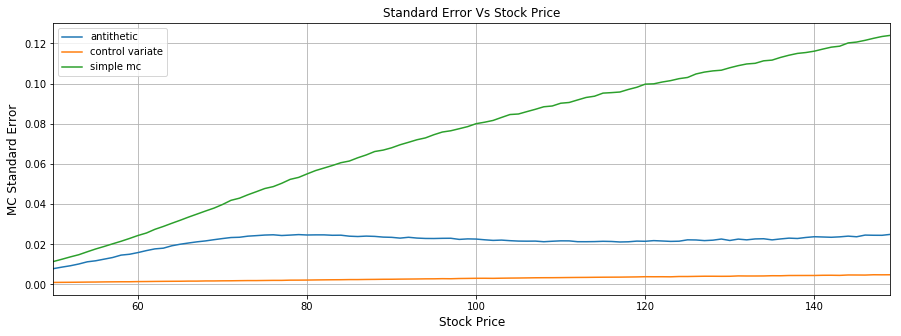

In [123]:
navg  =   9
#
# Simulation Parameters -------------------------------------------------------------
#
b     = 100000   # number of paths
M     = 10       # number of points for each path
dt    = float(T) /float( M)
df    = math.exp(-r * T)
#
# -----------------------------------------------------------------------------------
#
x   = []
y1  = []
y2  = []
y3  = []
for S0 in np.arange(50, 150, 1):
    #
    # Random numbers generations. We use the function 'randn' which returns 
    # a sample (or samples) from the "standard normal" distribution.
    # If positive, int_like or int-convertible arguments are provided,
    # 'randn' generates an array of shape (d0, d1, ..., dn), filled
    # with random floats sampled from a univariate "normal" (Gaussian)
    # distribution of mean 0 and variance 1
    #
    z1  = np.random.randn(M, b) 
    #
    # Stock Price Paths. The function 'cumsum' returns the cumulative sum 
    # of the elements along a given axis, in this case we want to sum along
    # the time axis (axis=0)
    #
    #--------------------------------------------------------------------------------
    #
    # Simple Montecarlo without variance reduction
    #
    S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
        + sigma * math.sqrt(dt) * z1, axis=0))
    S1 = np.insert(S1, 0, S0, axis=0)

    avg  = np.average(S1[-navg:-1,:], axis=0)
    gavg = gmean     (S1[-navg:-1,:], axis=0)
    
    opt_asian_1      = np.maximum(avg   - K, 0) * df
    std_dev_1        = np.std(opt_asian_1)/math.sqrt(float(b))
    opt_asian_1      = np.average(opt_asian_1)
    #
    #--------------------------------------------------------------------------------
    #
    # Antithetic Variable 
    #
    z2  = np.random.randn(M, int(b/2))  
    #
    S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * z2, axis=0))
    S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * (-z2), axis=0))
    S21 = np.insert(S21, 0, S0, axis=0)
    S22 = np.insert(S22, 0, S0, axis=0)

    avg1  = np.average(S21[-navg:-1,:], axis=0)
    avg2  = np.average(S22[-navg:-1,:], axis=0)
    
    opt_asian_21 = np.maximum(avg1 - K, 0) * df
    opt_asian_22 = np.maximum(avg2 - K, 0) * df

    opt_asian_2 = 0.5 * (opt_asian_21 + opt_asian_22)
    std_dev_2   = np.std(opt_asian_2)/math.sqrt(float(b))
    opt_asian_2 = np.average(opt_asian_2)
    #
    #--------------------------------------------------------------------------------
    #
    # Control Variate 
    #
    opt_estimate    = np.maximum(avg   - K, 0) * df 
    control_variate = np.maximum(gavg  - K, 0) * df
    
    covariance      = np.cov(control_variate, opt_estimate)
    variance        = np.var(control_variate)
    
    beta            = covariance[0][1]/variance
    
    opt_asian_g_teo = AsianGeometric(1, S0, K, r, delta, sigma, T, navg)
    opt_asian_3     = opt_estimate - beta*(control_variate - opt_asian_g_teo)
    std_dev_3       = np.std(opt_asian_3)/math.sqrt(float(b))
    opt_asian_3     = np.average(opt_asian_3)
    
    x.append(S0)
    y1.append(std_dev_1)
    y2.append(std_dev_2)
    y3.append(std_dev_3)

    sys.stdout.write("\r" + 'Stock price : ' + str(S0))
    sys.stdout.flush()

#
# -----------------------------------------------------------------------------------
#
if len(x) > 1:
    
    y_inf = 0.9
    y_sup = 2.0 - y_inf
    
    df1 = pd.DataFrame({'simple mc':y1, 'antithetic':y2, 'control variate':y3}, index=x)
    ax = df1.plot.line()
    ax.set_xlim((min(x), max(x)))
     
    plt.title('Standard Error Vs Stock Price', fontsize=12)
    plt.xlabel('Stock Price',                  fontsize=12)
    plt.ylabel('MC Standard Error',            fontsize=12)
    plt.grid(True)
    
    filename = 'variance_reduction_1.png'
    plt.savefig(filename)
    plt.show()

#### With respect to $\sigma$ ####

Sigma : 0.490000000000000045

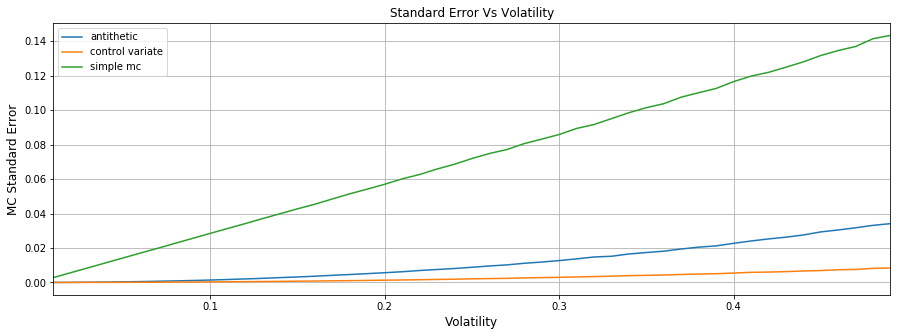

In [125]:
navg  =   24
#
# Simulation Parameters -------------------------------------------------------------
#
b     = 100000   # number of paths
M     = 25      # number of points for each path
dt    = float(T) /float( M)
df    = math.exp(-r * T)
#
# -----------------------------------------------------------------------------------
#
x   = []
y1  = []
y2  = []
y3  = []
for sigma in np.arange(.01, .5, .01):
    #
    # Random numbers generations. We use the function 'randn' which returns 
    # a sample (or samples) from the "standard normal" distribution.
    # If positive, int_like or int-convertible arguments are provided,
    # 'randn' generates an array of shape (d0, d1, ..., dn), filled
    # with random floats sampled from a univariate "normal" (Gaussian)
    # distribution of mean 0 and variance 1
    #
    z1  = np.random.randn(M, b) 
    #
    # Stock Price Paths. The function 'cumsum' returns the cumulative sum 
    # of the elements along a given axis, in this case we want to sum along
    # the time axis (axis=0)
    #
    #--------------------------------------------------------------------------------
    #
    # Simple Montecarlo without variance reduction
    #
    S1 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
        + sigma * math.sqrt(dt) * z1, axis=0))
    S1 = np.insert(S1, 0, S0, axis=0)

    avg  = np.average(S1[-navg:-1,:], axis=0)
    gavg = gmean     (S1[-navg:-1,:], axis=0)
    
    opt_asian_1      = np.maximum(avg   - K, 0) * df
    std_dev_1        = np.std(opt_asian_1)/math.sqrt(float(b))
    opt_asian_1      = np.average(opt_asian_1)
    #
    #--------------------------------------------------------------------------------
    #
    # Antithetic Variable 
    #
    z2  = np.random.randn(M, int(b/2))  
    #
    S21 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * z2, axis=0))
    S22 = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt 
           + sigma * math.sqrt(dt) * (-z2), axis=0))
    S21 = np.insert(S21, 0, S0, axis=0)
    S22 = np.insert(S22, 0, S0, axis=0)

    avg1  = np.average(S21[-navg:-1,:], axis=0)
    avg2  = np.average(S22[-navg:-1,:], axis=0)
    
    opt_asian_21 = np.maximum(avg1 - K, 0) * df
    opt_asian_22 = np.maximum(avg2 - K, 0) * df

    opt_asian_2 = 0.5 * (opt_asian_21 + opt_asian_22)
    std_dev_2   = np.std(opt_asian_2)/math.sqrt(float(b))
    opt_asian_2 = np.average(opt_asian_2)
    #
    #--------------------------------------------------------------------------------
    #
    # Control Variate 
    #
    opt_estimate    = np.maximum(avg   - K, 0) * df 
    control_variate = np.maximum(gavg  - K, 0) * df
    
    covariance      = np.cov(control_variate, opt_estimate)
    variance        = np.var(control_variate)
    
    beta            = covariance[0][1]/variance
    
    opt_asian_g_teo = AsianGeometric(1, S0, K, r, delta, sigma, T, navg)
    opt_asian_3     = opt_estimate - beta*(control_variate - opt_asian_g_teo)
    std_dev_3       = np.std(opt_asian_3)/math.sqrt(float(b))
    opt_asian_3     = np.average(opt_asian_3)
    
    x.append(sigma)
    y1.append(std_dev_1)
    y2.append(std_dev_2)
    y3.append(std_dev_3)

    sys.stdout.write("\r" + 'Sigma : ' + str(round(sigma,3))
    sys.stdout.flush()
#
# -----------------------------------------------------------------------------------
#
if len(x) > 1:

    df1 = pd.DataFrame({'simple mc':y1, 'antithetic':y2, 'control variate':y3}, index=x)
    ax = df1.plot.line()
    ax.set_xlim((min(x), max(x)))
    
    plt.title('Standard Error Vs Volatility', fontsize=12)
    plt.xlabel('Volatility',              fontsize=12)
    plt.ylabel('MC Standard Error',       fontsize=12)
    plt.grid(True)
    
    filename = 'variance_reduction_2.png'
    plt.savefig(filename)
    plt.show()

## Moment Matching ##

The moment matching method try to reduce the estimator variance through the adjustment of the samples extracted from a standardized normal distribution in order to ensure the equality between the sample moments (generally the first and the second) and the corresponding moments of the probabilistic distribution.

If we indicate with $Z_i$ a sample of random variables, to ensure the equality of the first two moments, we calculate the sample mean $m$ and the sample standard deviation s. So we define the adjusted samples as follows

$$
Z^\prime_i = \frac{Z_i - m}{s}
$$

## References ##

*Paul Glasserman*, **Monte Carlo Methods in Financial Engineering**, Springer (2004)
